In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlpack
from sklearn.metrics import *

In [14]:
%matplotlib inline
sns.set(color_codes=True)

In [15]:
graduateData = pd.read_csv("Admission_Predict.csv")

In [16]:
graduateData.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [36]:
graduateData.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

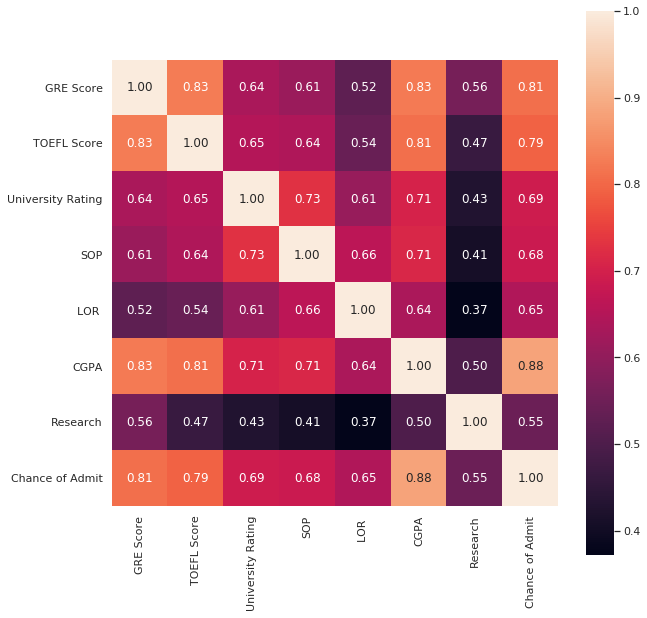

In [38]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(graduateData.corr(), square=True, fmt=".2f", annot=True)

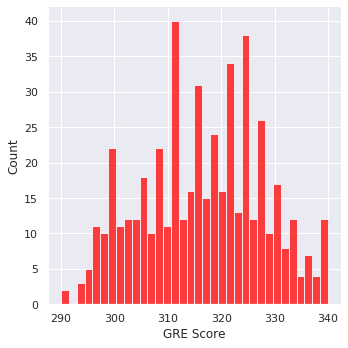

In [35]:
sns.displot(graduateData["GRE Score"], bins=34, color="Red")

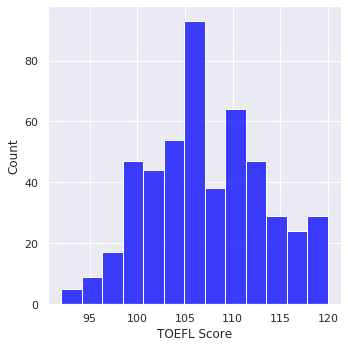

In [26]:
sns.displot(graduateData["TOEFL Score"], bins=13, color="Blue")

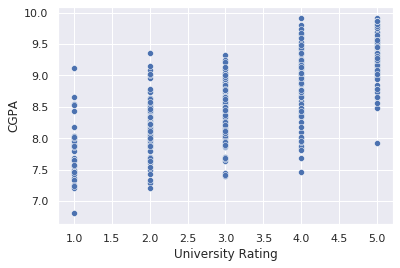

In [28]:
sns.scatterplot(x="University Rating", y="CGPA", data=graduateData)

In [29]:
co_gre = graduateData[graduateData["GRE Score"] >= 300]
co_toefl = graduateData[graduateData["TOEFL Score"] >= 100]

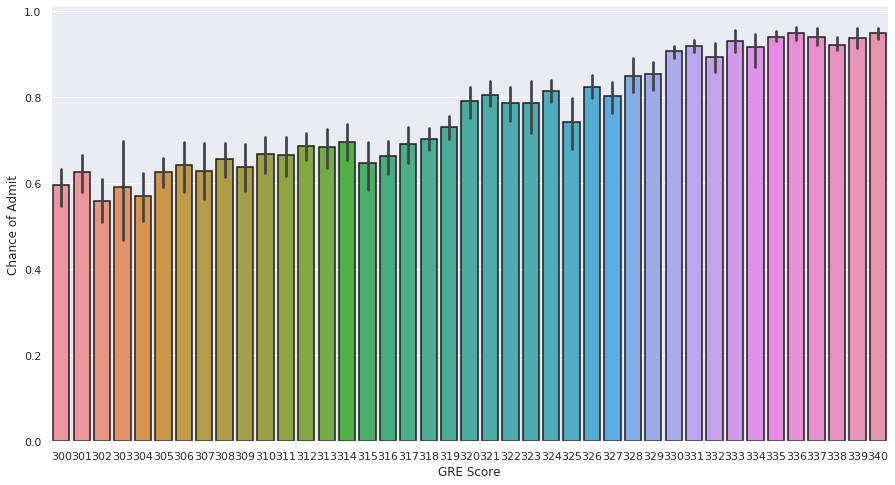

In [31]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x="GRE Score", y="Chance of Admit", data=co_gre, linewidth=1.5, edgecolor="0.1")

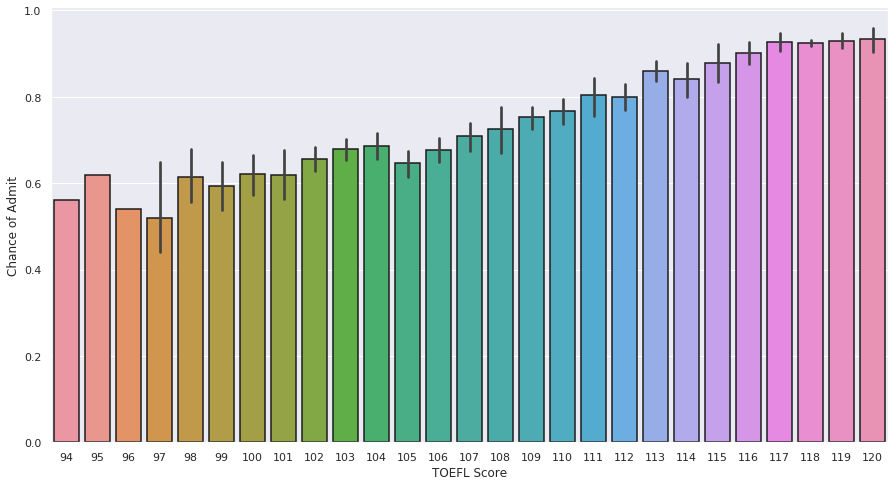

In [39]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="TOEFL Score", y="Chance of Admit", data=co_gre, linewidth=1.5, edgecolor="0.1")

In [41]:
print(f"Average GRE Score: {graduateData['GRE Score'].mean() :.2f} out of 340")
print(f"Average TOEFL Score: {graduateData['TOEFL Score'].mean() :.2f} out of 120")
print(f"Average CGPA: {graduateData['CGPA'].mean() :.2f} out of 10")
print(f"Average chance of getting admitted: {graduateData['Chance of Admit'].mean() * 100}")

Average GRE Score: 316.47 out of 340
Average TOEFL Score: 107.19 out of 120
Average CGPA: 8.58 out of 10
Average chance of getting admitted: 72.174


In [69]:
features = graduateData.drop("Chance of Admit", axis=1)
target = graduateData["Chance of Admit"]
target = target.apply(lambda x: 1 if x > 0.8 else 0)

In [70]:
train_len = len(features)
train_idxs = list(range(train_len))
np.random.shuffle(train_idxs)
split = int(np.floor(0.25 * train_len))
Xtest = features.iloc[train_idxs[:split], :].values
Xtrain = features.iloc[train_idxs[split:], :].values
ytest = target.iloc[train_idxs[:split]].values
ytrain = target.iloc[train_idxs[split:]].values

In [71]:
output = mlpack.adaboost(training=Xtrain, labels=ytrain, weak_learner="decision_stump")

In [72]:
ab = output["output_model"]

In [73]:
predictions = mlpack.adaboost(input_model=ab, test=Xtest)

In [74]:
yPreds = predictions["predictions"].reshape(-1, 1).squeeze()

In [75]:
def plot_rocAUC(fper, tper):
    plt.plot(fper, tper, color="orange", label="ROC")
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

Accuracy: 0.928
ROC AUC: 0.926043557168784
Cohen's Kappa: 0.833555259653795
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        87
           1       0.85      0.92      0.89        38

    accuracy                           0.93       125
   macro avg       0.91      0.93      0.92       125
weighted avg       0.93      0.93      0.93       125



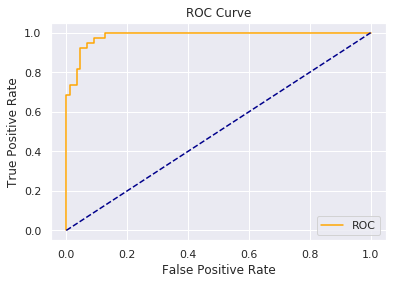

In [76]:
print(f"Accuracy: {accuracy_score(ytest, yPreds)}")
print(f"ROC AUC: {roc_auc_score(ytest, yPreds)}")
print(f"Cohen's Kappa: {cohen_kappa_score(ytest, yPreds)}")
print(classification_report(ytest,yPreds))
fper, tper, thresh = roc_curve(ytest, predictions["probabilities"][:, 1])
plot_rocAUC(fper, tper)